# 1st Convolution Neural Network

In [2]:
import numpy as np

from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.backend as K 

from tensorflow.keras.datasets import cifar10

## Data Load

In [3]:
NUM_CLASSES = 10

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [6]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [8]:
x_train[48, 6, 11, 1]

0.47843137

## Build Model

In [9]:
input_layer = Input(shape=(32, 32, 3))

conv_layer_1 = Conv2D(
    filters = 10,
    kernel_size = (4,4),
    strides = 2,
    padding = 'same'
)(input_layer)

conv_layer_2 = Conv2D(
    filters = 20,
    kernel_size = (3, 3),
    strides = 2,
    padding = 'same'
)(conv_layer_1)

flatten_layer = Flatten()(conv_layer_2)
output_layer = Dense(units=10, activation='softmax')(flatten_layer)
model = Model(input_layer, output_layer)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 16, 16, 10)        490       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 20)          1820      
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


In [22]:
input_layer = Input((32,32,3))

x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)

## Training

In [23]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [24]:
model.fit(x_train,
          y_train,
          batch_size=32,
          epochs=10,
          shuffle=True,
          validation_data = (x_test, y_test)
          )

Epoch 1/10
1563/1563 [==============================] - 20s 6ms/step - loss: 1.5538 - accuracy: 0.4569 - val_loss: 1.5958 - val_accuracy: 0.4571
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1531 - accuracy: 0.5953 - val_loss: 1.8091 - val_accuracy: 0.4385
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0056 - accuracy: 0.6491 - val_loss: 4.3969 - val_accuracy: 0.2364
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9232 - accuracy: 0.6786 - val_loss: 0.9099 - val_accuracy: 0.6810
Epoch 5/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8597 - accuracy: 0.6984 - val_loss: 0.9205 - val_accuracy: 0.6804
Epoch 6/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8083 - accuracy: 0.7179 - val_loss: 0.8410 - val_accuracy: 0.7062
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7594 - accuracy: 0.7361 - val_loss: 0.7956 - val_accu

## Evaluation

In [25]:
model.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 1s 22ms/step - loss: 0.8053 - accuracy: 0.7256


[0.805260181427002, 0.725600004196167]

In [26]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

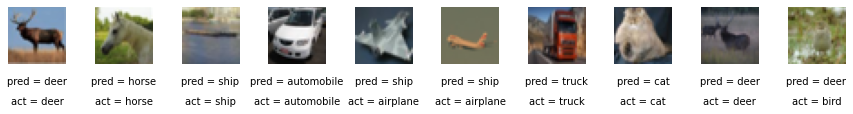

In [27]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)